In [30]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Data Loading and Preprocessing

In [31]:
df = pd.read_csv('IMDB Dataset.csv')

In [32]:
df.dropna(inplace=True)

In [33]:
def clean_text(text):
    # Remove HTML tags like <br />
    text = re.sub(r'<.*?>', '', text)
    # Remove all non-alphabetic characters and convert to lowercase.
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # Remove any extra whitespace.
    text = ' '.join(text.split())
    return text

print("Cleaning and preprocessing text data...")
df['cleaned_review'] = df['review'].apply(clean_text)
print("Preprocessing complete.")

Cleaning and preprocessing text data...
Preprocessing complete.


# Step 2: Exploratory Data Analysis (EDA)

In [34]:
temp_df_for_viz = df.copy()

/tmp/ipython-input-2285012117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=temp_df_for_viz, palette='rocket')


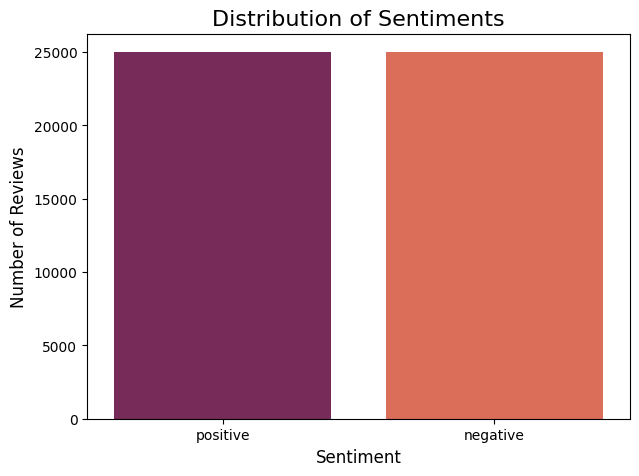

In [35]:
# 2a: Visualize the sentiment distribution to check for class balance.
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', data=temp_df_for_viz, palette='rocket')
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

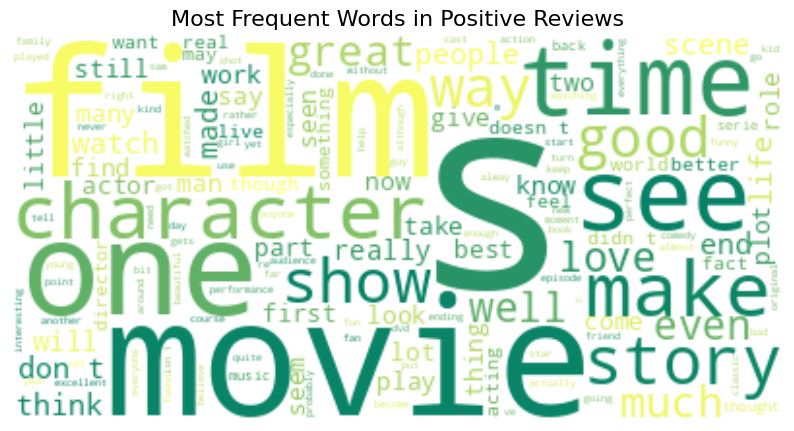

In [37]:
# 2b: Generate a word cloud for positive reviews.
positive_text = " ".join(review for review in df[df['sentiment']=='positive']['cleaned_review'])
wordcloud_positive = WordCloud(max_words=150, background_color="white", colormap='summer').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Positive Reviews", fontsize=16)
plt.show()

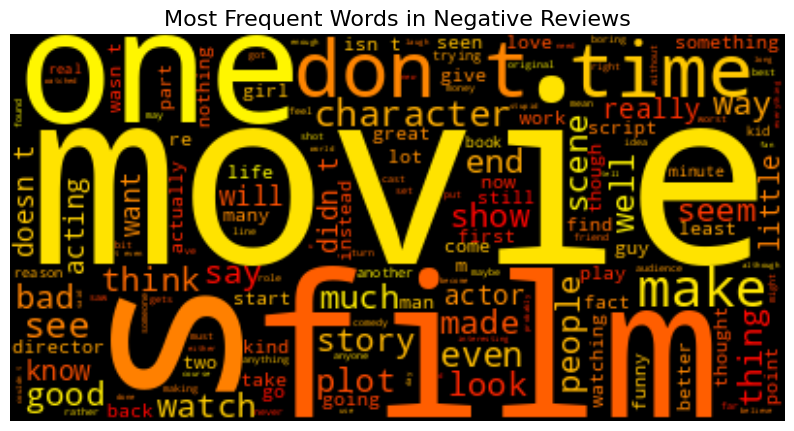

EDA complete.


In [38]:
# 2c: Generate a word cloud for negative reviews.
negative_text = " ".join(review for review in df[df['sentiment']=='negative']['cleaned_review'])
wordcloud_negative = WordCloud(max_words=150, background_color="black", colormap='autumn').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Negative Reviews", fontsize=16)
plt.show()
print("EDA complete.")

# Step 3: Feature Extraction and Data Splitting

In [39]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [40]:
X = df['cleaned_review']
y = df['sentiment']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
print("\nPerforming feature extraction with TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("Feature extraction complete.")


Performing feature extraction with TF-IDF...
Feature extraction complete.


# Step 4: Model Building and Evaluation

In [43]:
print("\nTraining the Logistic Regression model...")
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_tfidf, y_train)
print("Model training complete.")


Training the Logistic Regression model...
Model training complete.


In [44]:
y_pred = model.predict(X_test_tfidf)

In [45]:
print("\n--- Model Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")


--- Model Evaluation Results ---
Model Accuracy: 0.8899



In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      5000
    Positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



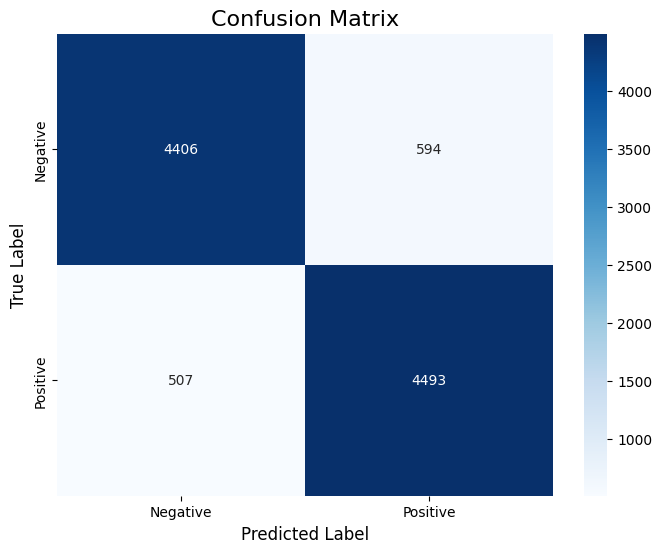

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()